In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [4]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [5]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [6]:
# Ausreißer manuell auf np.nan setzen
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [7]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [130]:
def sum_curve(data, station, date_start, date_end, i):

    # set DataFrame for this run of this funktion
    dataframe = data[station][date_start:date_end]
    
    # Messwerte der Station aufsummieren
    sum_list = dataframe.cumsum().tolist()
    sum = data[station][date_start:date_end].sum()

    # "Summendataframe" erstellen
    index_sum_df = dataframe.index
    sum_df = pd.Series(data=sum_list, index=index_sum_df)

    # Subplot erstellen
    fig, ax = plt.subplots()

    # plot Tageswerte
    ax.plot(index_sum_df, dataframe, label='Tageswerte', color='green')
    ax.set_ylabel('Tageswert [mm]')
    plt.xticks(rotation=45)
    plt.legend(loc=9)

    # plot Summenkurve
    ax = ax.twinx()
    ax.plot(index_sum_df, sum_list, label='Summenkurve', color='red')
    ax.set_ylabel('Summenkurve [mm]')
    plt.legend(loc=2)

    name_plot = 'Summenkurve + Tageswerte, Station: ' + list_stations_names[i]
    plt.title(name_plot)
    plt.xlabel('DateTime')
    plt.legend()
    
    plt.show()
    plt.close()
    
    return print('Gesamtniederschlag über Zeitraum:', round(sum, 2), 'mm\n')

In [117]:
reference = Raine_rtu['Niederschlagsmenge']
station = WS100_rtu['precipitation.1']

mask_reference = reference.notnull()
mask_station = station.notnull()

mask = mask_station & mask_reference

In [119]:
len(WS100_rtu['precipitation.1'][mask].loc[Raine_rtu.index.min():Raine_rtu.index.max()])

505520

In [120]:
len(WS100_rtu['precipitation.1'].loc[Raine_rtu.index.min():Raine_rtu.index.max()])

505713

In [123]:
list_stations = [WS100_rtu['precipitation.1'], WS300_rtu['precipitation.1'], L_pcp_rtu['rr_07'], L_pcp_rtu['rr_09'], L_pcp_rtu['rr_10'], lhg_rtu['lhg05'], lhg_rtu['lhg07'], lhg_rtu['lhg09'], lhg_rtu['lhg10'], lhg_rtu['lhg11']]
list_stations_columns = ['precipitation.1', 'precipitation.1', 'rr_07', 'rr_09', 'rr_10', 'lhg05', 'lhg07', 'lhg09', 'lhg10', 'lhg11']
list_stations_names = ['WS100', 'WS300', 'L_pcp_07', 'L_pcp_09', 'L_pcp_10', 'lhg05', 'lhg07', 'lhg09', 'lhg10', 'lhg11']

In [127]:
print('Timestamps Raine:', len(Raine_rtu.index), '\n')
reference = Raine_rtu['Niederschlagsmenge']
mask_reference = reference.notnull()

for i in range(len(list_stations)):

    station = list_stations[i]
    mask_station = station.notnull()

    mask = mask_station & mask_reference

    print(list_stations_names[i])
    print('Anzahl Timestamps die gleich sind mit Raine:', len(station[station.index.isin(reference.index)].index))
    print('Anzahl Timestamps für die Raine und', list_stations_names[i], 'Werte haben:', len(station[mask].loc[Raine_rtu.index.min():Raine_rtu.index.max()].index))
    print('Differenz:', len(station[station.index.isin(reference.index)].index) - len(station[mask].loc[Raine_rtu.index.min():Raine_rtu.index.max()].index), '\n')

Timestamps Raine: 772077 

WS100
Anzahl Timestamps die gleich sind mit Raine: 505713
Anzahl Timestamps für die Raine und WS100 Werte haben: 505520
Differenz: 193 

WS300
Anzahl Timestamps die gleich sind mit Raine: 509577
Anzahl Timestamps für die Raine und WS300 Werte haben: 15747
Differenz: 493830 

L_pcp_07
Anzahl Timestamps die gleich sind mit Raine: 772077
Anzahl Timestamps für die Raine und L_pcp_07 Werte haben: 771884
Differenz: 193 

L_pcp_09
Anzahl Timestamps die gleich sind mit Raine: 772077
Anzahl Timestamps für die Raine und L_pcp_09 Werte haben: 771884
Differenz: 193 

L_pcp_10
Anzahl Timestamps die gleich sind mit Raine: 772077
Anzahl Timestamps für die Raine und L_pcp_10 Werte haben: 771884
Differenz: 193 

lhg05
Anzahl Timestamps die gleich sind mit Raine: 99471
Anzahl Timestamps für die Raine und lhg05 Werte haben: 78538
Differenz: 20933 

lhg07
Anzahl Timestamps die gleich sind mit Raine: 99471
Anzahl Timestamps für die Raine und lhg07 Werte haben: 92027
Differenz: 74

In [91]:
# Differenz der Niederschlagsmenge, nur mit Timestamps, bei denen beide Stationen einen Wert aufgezeichnet haben

list_stations = [WS100_rtu['precipitation.1'], WS300_rtu['precipitation.1'], L_pcp_rtu['rr_07'], L_pcp_rtu['rr_09'], L_pcp_rtu['rr_10'], lhg_rtu['lhg05'], lhg_rtu['lhg07'], lhg_rtu['lhg09'], lhg_rtu['lhg10'], lhg_rtu['lhg11']]
list_stations_names = ['WS100', 'WS300', 'L_pcp_07', 'L_pcp_09', 'L_pcp_10', 'lhg05', 'lhg07', 'lhg09', 'lhg10', 'lhg11']

reference = Raine_rtu['Niederschlagsmenge']
mask_reference = reference.notnull()

for i in range(len(list_stations)):

    mask_station = list_stations[i].notnull()

    mask = mask_station & mask_reference

    print('Differenz Niederschlagsmenge (' + list_stations_names[i], '- Raine):', round(list_stations[i][mask].sum() - reference[mask].sum(), 2))

Differenz Niederschlagsmenge (WS100 - Raine): -25.34
Differenz Niederschlagsmenge (WS300 - Raine): -27.82
Differenz Niederschlagsmenge (L_pcp_07 - Raine): -50.58
Differenz Niederschlagsmenge (L_pcp_09 - Raine): 8.96
Differenz Niederschlagsmenge (L_pcp_10 - Raine): -42.51
Differenz Niederschlagsmenge (lhg05 - Raine): 395.09
Differenz Niederschlagsmenge (lhg07 - Raine): 513.91
Differenz Niederschlagsmenge (lhg09 - Raine): 0.0
Differenz Niederschlagsmenge (lhg10 - Raine): 515.63
Differenz Niederschlagsmenge (lhg11 - Raine): 265.19


In [61]:
print('Summe der Station unter Verwendung von Zeitschritten, die im Raine Index vorhanden sind', '\n')

print('Raine', Raine_rtu['Niederschlagsmenge'].sum(), '\n')

print(list_stations_names[0], round(WS100_rtu[WS100_rtu.index.isin(Raine_rtu.index)]['precipitation.1'].sum(), 2))
print(list_stations_names[1], round(WS300_rtu[WS300_rtu.index.isin(Raine_rtu.index)]['precipitation.1'].sum(), 2))
print(list_stations_names[2], round(L_pcp_rtu[L_pcp_rtu.index.isin(Raine_rtu.index)]['rr_07'].sum(), 2))
print(list_stations_names[3], round(L_pcp_rtu[L_pcp_rtu.index.isin(Raine_rtu.index)]['rr_09'].sum(), 2))
print(list_stations_names[4], round(L_pcp_rtu[L_pcp_rtu.index.isin(Raine_rtu.index)]['rr_10'].sum(), 2))
print(list_stations_names[5], round(lhg_rtu[lhg_rtu['lhg05'].index.isin(Raine_rtu.index)]['lhg05'].sum(), 2))
print(list_stations_names[6], round(lhg_rtu[lhg_rtu['lhg07'].index.isin(Raine_rtu.index)]['lhg07'].sum(), 2))
print(list_stations_names[7], round(lhg_rtu[lhg_rtu['lhg09'].index.isin(Raine_rtu.index)]['lhg09'].sum(), 2))
print(list_stations_names[8], round(lhg_rtu[lhg_rtu['lhg10'].index.isin(Raine_rtu.index)]['lhg10'].sum(), 2))
print(list_stations_names[9], round(lhg_rtu[lhg_rtu['lhg11'].index.isin(Raine_rtu.index)]['lhg11'].sum(), 2))

Summe der Station unter Verwendung von Zeitschritten, die im Raine Index vorhanden sind 

Raine 1062.04 

WS100 591.61
WS300 0.0
L_pcp_07 1011.46
L_pcp_09 1071.0
L_pcp_10 1019.53
lhg05 482.78
lhg07 606.0
lhg09 0.0
lhg10 616.1
lhg11 326.13


In [62]:
print('Summe der Station unter Verwendung von Raine Start- und End-Index', '\n')

print('Raine', Raine_rtu['Niederschlagsmenge'].sum(), '\n')

print(list_stations_names[0], round(WS100_rtu['precipitation.1'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[1], round(WS300_rtu['precipitation.1'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[2], round(L_pcp_rtu['rr_07'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[3], round(L_pcp_rtu['rr_09'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[4], round(L_pcp_rtu['rr_10'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[5], round(lhg_rtu['lhg05'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[6], round(lhg_rtu['lhg07'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[7], round(lhg_rtu['lhg09'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[8], round(lhg_rtu['lhg10'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))
print(list_stations_names[9], round(lhg_rtu['lhg11'].loc[Raine_rtu.index.min() : Raine_rtu.index.max()].sum(), 2))

Summe der Station unter Verwendung von Raine Start- und End-Index 

Raine 1062.04 

WS100 591.61
WS300 0.0
L_pcp_07 1011.49
L_pcp_09 1071.0
L_pcp_10 1019.53
lhg05 482.78
lhg07 606.0
lhg09 0.0
lhg10 616.1
lhg11 326.13


In [139]:
list_stations = [WS100_rtu, WS300_rtu, L_pcp_rtu, L_pcp_rtu, L_pcp_rtu, lhg_rtu, lhg_rtu, lhg_rtu, lhg_rtu, lhg_rtu]
list_stations_columns = ['precipitation.1', 'precipitation.1', 'rr_07', 'rr_09', 'rr_10', 'lhg05', 'lhg07', 'lhg09', 'lhg10', 'lhg11']
list_stations_names = ['WS100', 'WS300', 'L_pcp_07', 'L_pcp_09', 'L_pcp_10', 'lhg05', 'lhg07', 'lhg09', 'lhg10', 'lhg11', 'Raine']

In [158]:
lhg_rtu['lhg09'][lhg_rtu['lhg09'] == lhg_rtu['lhg09'].max()] = np.nan

In [143]:
fct.i_nans_before_peak(lhg_rtu, 'sc', 'lhg09', 0.99)

1 leading nans before 2021-01-18 10:35:00
1 leading nans before 2021-01-18 11:40:00
2 leading nans before 2021-01-28 08:15:00
2 leading nans before 2021-01-30 20:20:00
1 leading nans before 2021-02-01 06:10:00
1 leading nans before 2021-02-03 10:25:00
3 leading nans before 2021-02-03 10:55:00
1 leading nans before 2021-02-03 13:35:00
1 leading nans before 2021-02-04 22:55:00


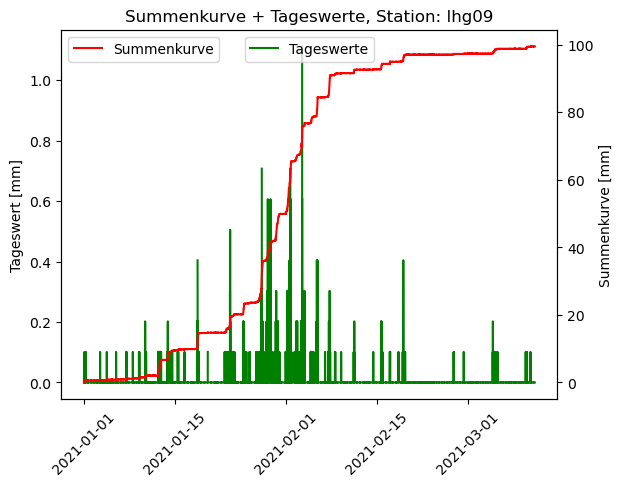

Gesamtniederschlag über Zeitraum: 99.48 mm



In [159]:
sum_curve(lhg_rtu, 'lhg09', lhg_rtu.index.min(), lhg_rtu.index.max(), 7)

WS100


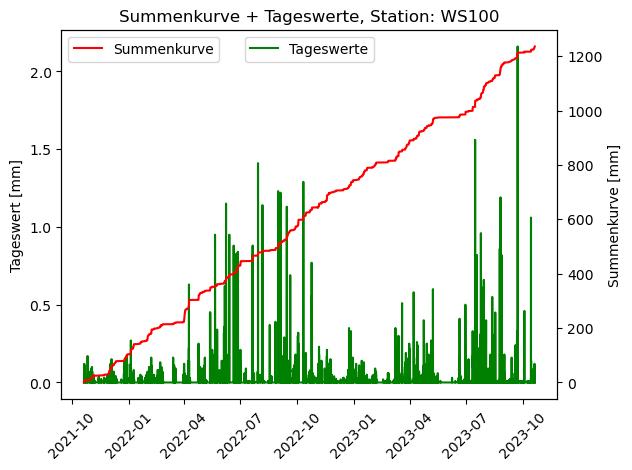

Gesamtniederschlag über Zeitraum: 1235.74 mm

WS300


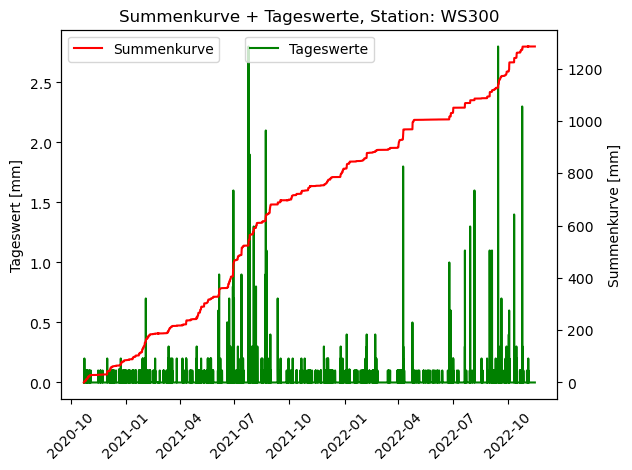

Gesamtniederschlag über Zeitraum: 1284.8 mm

L_pcp_07


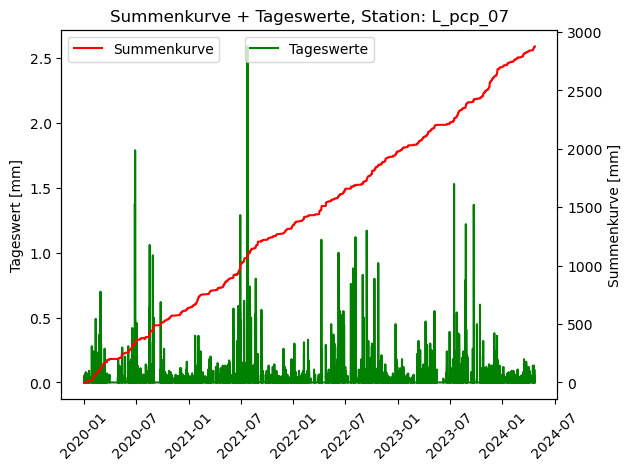

Gesamtniederschlag über Zeitraum: 2876.39 mm

L_pcp_09


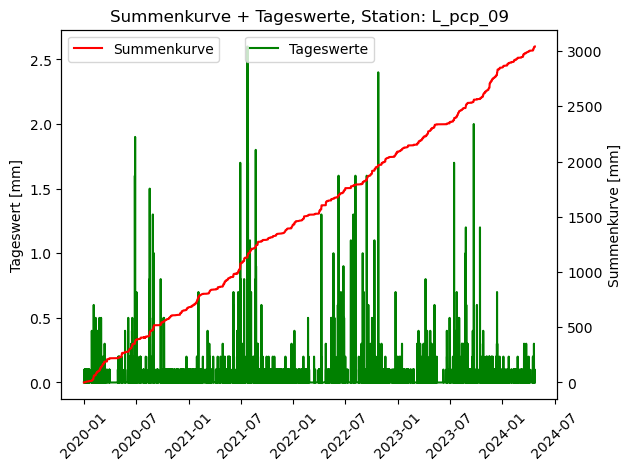

Gesamtniederschlag über Zeitraum: 3041.6 mm

L_pcp_10


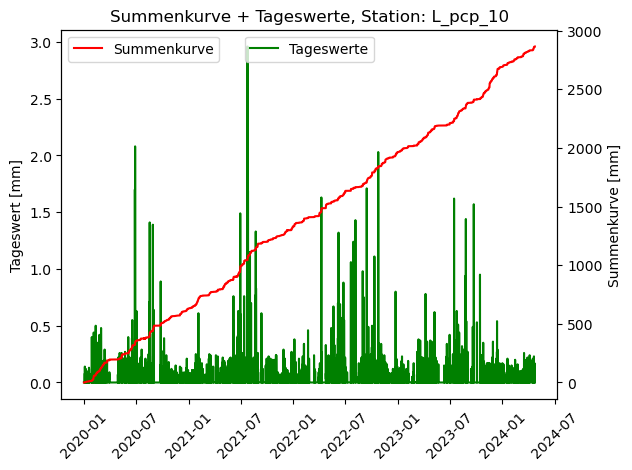

Gesamtniederschlag über Zeitraum: 2865.21 mm

lhg05


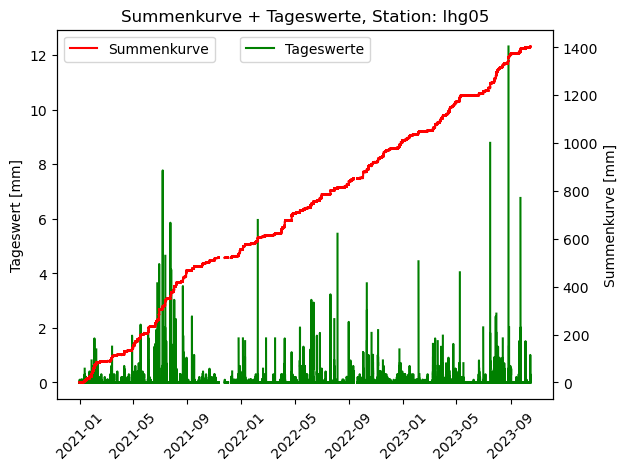

Gesamtniederschlag über Zeitraum: 1404.0 mm

lhg07


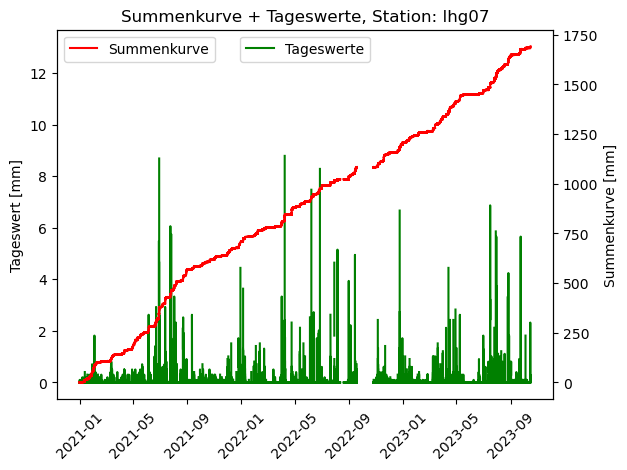

Gesamtniederschlag über Zeitraum: 1690.84 mm

lhg09


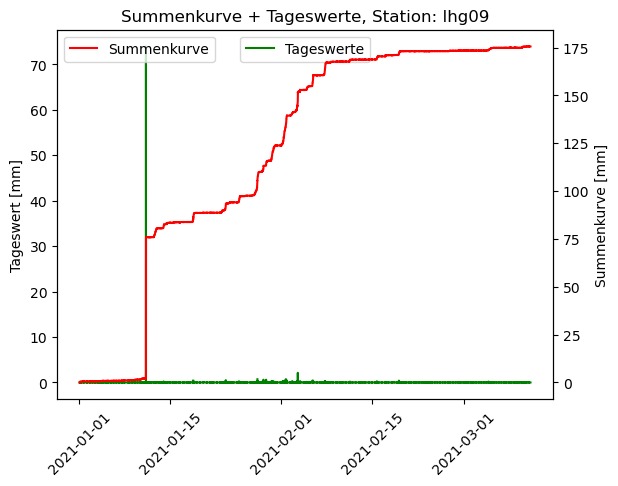

Gesamtniederschlag über Zeitraum: 175.54 mm

lhg10


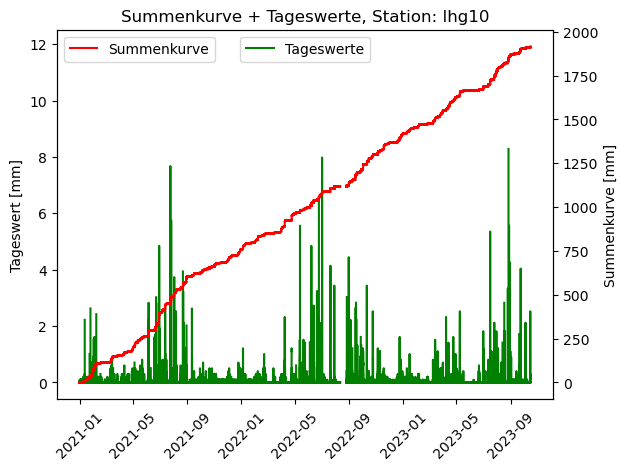

Gesamtniederschlag über Zeitraum: 1916.27 mm

lhg11


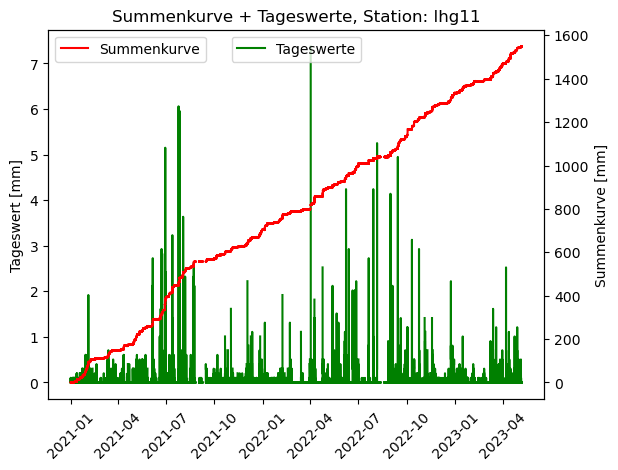

Gesamtniederschlag über Zeitraum: 1548.63 mm



In [131]:
for i in range(len(list_stations)):
    print(list_stations_names[i])
    sum_curve(list_stations[i], list_stations_columns[i], list_stations[i].index.min(), list_stations[i].index.max(), i)